<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Feature selection</h1>

## 1. Aims
<div class="alert alert-info">
To carry out feature selection on the leukaemia data.
</div>

## 2. Feature selection 
<div class="alert alert-info">
On the course webpage, you can download a (slightly reduced) version of the leukaemia data. It consists of some training data $X$ and associated labels $t$ as well as independent test data $X_{test}$ and $t_{test}$. Your task is to select some features and classify the data – in previous labs we have implemented code for classification and you may use whichever you like.
</div>

In [1]:
import numpy as np
import scipy.io
leuk = scipy.io.loadmat('labdata.mat')

In [2]:
X = leuk['X']
t = leuk['t']
X_test = leuk['X_test']
t_test = leuk['t_test']

In [51]:
print(X_test.shape)

(34, 300)


<div class="alert alert-info">
Observe the class distribution of the data.
</div>

In [6]:
print('Ratio of label 1 on train data : {}, test data : {}'.format(sum(t)[0]/len(t), sum(t_test)[0]/len(t_test)))

Ratio of label 1 on train data : 0.2894736842105263, test data : 0.4117647058823529


### 2.1 Feature selection 
<div class="alert alert-info">
You are free to use any of the feature selection schemes we covered – scoring the features, PCA, or clustering them (you should already have $k$-means code to do this). In each case, you should use the test set to investigate how performance varies as you change the number of features.</div>

#### 2.1.1 Scoring 
<div class="alert alert-info">
Use the scoring mechanism described in the lectures (only on the training data) to obtain a set of features (corresponding to a subset of the original ones). You should make sure you extract this subset from the test data too!
</div>

In [7]:
print(X)
print(t[35][0])

[[-0.45713124 -0.69263424  0.29633364 ...  0.21730571 -0.1673078
   0.15739718]
 [ 0.89193602 -0.62702194 -0.6404953  ... -0.6136722   0.02973757
   0.35886656]
 [-0.66561186 -0.71587953  0.47468232 ... -0.17755254 -0.23420224
  -0.23827526]
 ...
 [ 2.79664096  1.58757699 -1.48922906 ... -0.64409646  0.06347438
  -0.35203333]
 [ 2.8139067   1.20354252 -2.19543708 ... -0.59032615  0.19280163
  -0.465825  ]
 [ 1.16955862  0.95456885 -0.99388159 ... -0.57765874  0.40837461
   0.10677794]]
1


In [8]:
def order_features_by_score(X):
    scores = [0]*len(X[0])
    X_0 = np.array([X[i] for i in range(len(X)) if t[i][0] == 0])
    X_1 = np.array([X[i] for i in range(len(X)) if t[i][0] == 1])
    for i in range(len(scores)):
        mean_0 = np.mean(X_0[:, i])
        var_0 = np.var(X_0[:, i])
        mean_1 = np.mean(X_1[:, i])
        var_1 = np.var(X_1[:, i])
        scores[i] = abs(mean_1 - mean_0)/(var_0 + var_1)
    ordered_features = X.T
    scores, ordered_features = zip(*sorted(zip(scores, ordered_features), reverse=True))
    scores = list(scores)
    ordered_features = np.array(ordered_features).T
    return ordered_features, scores

/home/ckennedy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ckennedy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ckennedy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

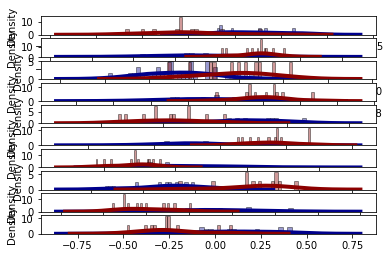

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
ordered_features, scores = order_features_by_score(X)
ordered_features_0 = np.array([ordered_features[i] for i in range(len(X)) if t[i][0] == 0])
ordered_features_1 = np.array([ordered_features[i] for i in range(len(X)) if t[i][0] == 1])

fig, axs = plt.subplots(10)

for i in range(10):
    sns.distplot(ordered_features_0[:, i], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=axs[i])
    sns.distplot(ordered_features_1[:, i], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=axs[i])

###### <div class="alert alert-info">
Plot the data by considering the top 2 features and comment on the results.
</div>

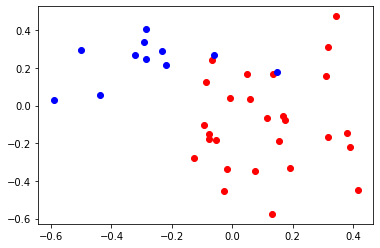

In [10]:
plt.scatter(ordered_features_0[:,0], ordered_features_0[:,1], color = 'red')
plt.scatter(ordered_features_1[:,0], ordered_features_1[:,1], color = 'blue')

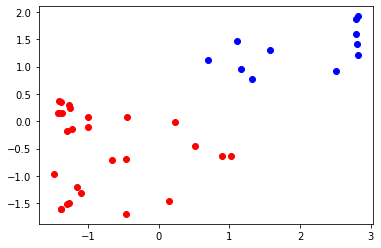

In [11]:
X_0 = np.array([X[i] for i in range(len(X)) if t[i][0] == 0])
X_1 = np.array([X[i] for i in range(len(X)) if t[i][0] == 1])
plt.scatter(X_0[:,0], X_0[:,1], color = 'red')
plt.scatter(X_1[:,0], X_1[:,1], color = 'blue')

<div class="alert alert-info">
Does the visualisation of separate classes improve if you consider the top 3 features instead?</div>

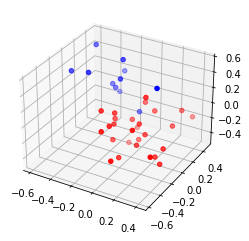

In [12]:
ax = plt.axes(projection='3d')

ax.scatter(ordered_features_0[:,0], ordered_features_0[:,1], ordered_features_0[:,2], color = 'red')
ax.scatter(ordered_features_1[:,0], ordered_features_1[:,1], ordered_features_1[:,2], color = 'blue')

#### 2.1.2 Clustering
<div class="alert alert-info">

You can use the $k$-means code you implemented in the previous notebook. Remember to pass the data the correct way around and only cluster the training data. Transforming the test data is a little more complex – your $k$-means should give you assignments of features to clusters. Use these alongside the test data to compute the cluster means for the test data (you do not need to re-assign the clusterings).

</div>

#### 2.1.3 Principal components
<div class="alert alert-info">
Implement a function for obtaining the $k$ principal components of your data.
Try to avoid using 'sklearn' libraries for this task!
</div>

In [13]:
def distance_to_cluster(point, centroid):
    return (point-centroid).T@(point-centroid)

In [14]:
def closest_centroid(point, centroids):
    dists = [distance_to_cluster(point, centroids[i]) for i in range (len(centroids))]
    return dists.index(min(dists))

In [15]:
def compute_centroid(k, data, assigned):
    indices = [i for i, point in enumerate(assigned) if point == k]
    if len(indices)==0:
        return np.random.rand(2)
    centroid = np.mean(data[indices], axis = 0)
    return centroid

In [18]:
def kmeans(data, k, centroids=None):
    centroids = np.random.rand(k, len(data[0]))
    assigned_clusters = [0]*len(data)
    copy = np.random.rand(k, len(data[0]))
    i=0
    while (centroids!= copy).any():
        copy = centroids.copy()
        for i in range(len(data)):
            assigned_clusters[i] = closest_centroid(data[i], centroids)
        for i in range (k):
            centroids[i] = compute_centroid(i, data, assigned_clusters)
        i+=1
    return assigned_clusters

In [69]:
def pca_k(X, X_test, k):
    assigned_clusters = kmeans(X.T, k)
    X_test_trans = np.zeros((len(X_test),k))
    for i in range(len(X_test)):
        for j in range(k):
            feature_index = [l for l in range(len(X[0])) if assigned_clusters[l]==j]
            X_test_trans[i][j] = np.mean(X_test[i, feature_index])
    return X_test_trans

In [72]:
X_test_trans = pca_k(X, X_test, 2)

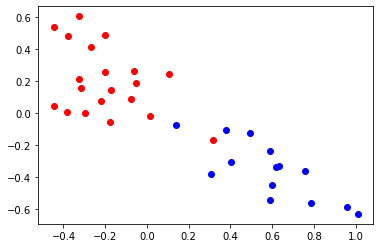

In [74]:
X_test0 = np.array([X_test_trans[i] for i in range(len(X_test)) if t_test[i][0] == 0])
X_test1 = np.array([X_test_trans[i] for i in range(len(X_test)) if t_test[i][0] == 1])

plt.scatter(X_test0[:,0], X_test0[:,1], color = 'red')
plt.scatter(X_test1[:,0], X_test1[:,1], color = 'blue')

In [75]:
X_test_trans = pca_k(X, X_test, 3)

[-0.38289773 -0.29840979 -0.32433514  0.01690268  0.10735414 -0.37729072
 -0.20121011 -0.32604947 -0.06270646 -0.44453512 -0.44708757 -0.07686109
 -0.31696475 -0.05230529  0.31768075 -0.20174975 -0.26914666 -0.17051527
 -0.17617361 -0.21914153]


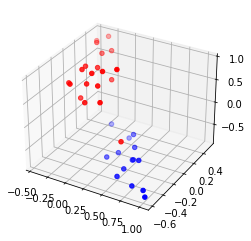

In [76]:
X_test0 = np.array([X_test_trans[i] for i in range(len(X_test)) if t_test[i][0] == 0])
X_test1 = np.array([X_test_trans[i] for i in range(len(X_test)) if t_test[i][0] == 1])

print(X_test0[:,0])
ax = plt.axes(projection='3d')

ax.scatter(X_test0[:,0], X_test0[:,1], X_test0[:,2], color = 'red')
ax.scatter(X_test1[:,0], X_test1[:,1], X_test1[:,2], color = 'blue')

<div class="alert alert-info">
As before, compare and contrast the effectiveness of using PCA when considering 2 and 3 principal components, respectively.<br>
Plot your results using scatter plots and comment on what you observe.
</div>

In [98]:
def PCA(X):
    cov = np.cov(X)
    print(cov.shape)
    W = list(np.linalg.eig(cov))
    print(W)

In [99]:
PCA(X)

(38, 38)
[array([9.24199739e+00, 1.77458752e+00, 1.00047500e+00, 6.69613969e-01,
       6.17968547e-01, 5.91073918e-01, 4.83975057e-01, 4.70385160e-01,
       4.06466757e-01, 3.77027674e-01, 3.12390563e-01, 3.02845281e-01,
       2.82850144e-01, 1.79051960e-16, 2.54898164e-01, 2.38120177e-01,
       2.15284235e-01, 2.09266171e-01, 2.02870039e-01, 4.40563045e-02,
       5.29222778e-02, 5.55621778e-02, 6.09695857e-02, 6.80535937e-02,
       1.70827361e-01, 1.65518957e-01, 1.61695586e-01, 7.67272669e-02,
       1.49861572e-01, 8.47695269e-02, 9.14844318e-02, 9.79638927e-02,
       1.08711740e-01, 1.12506310e-01, 1.20954307e-01, 1.27141018e-01,
       1.34302237e-01, 1.33700542e-01]), array([[-0.13472748, -0.14552896,  0.08001701, ..., -0.05301039,
         0.23322601, -0.15307224],
       [ 0.03713784,  0.20602943,  0.00594303, ...,  0.29791652,
        -0.21818262,  0.19725521],
       [-0.10545606,  0.33086776,  0.09828042, ...,  0.00347593,
        -0.01038863, -0.22043448],
       ...

## 3. Classification
<div class="alert alert-info">
Insofar, we have only considered how carrying out dimensionality reduction allows us to _visually_ distinguish the different classes of the dataset.<br><br>

Using any of the classification algorithms we developed in the previous lectures, assess how classification performance varies when carrying out any of the above feature selection techniques as a preprocessing step. </div>